(machine-learning-intro)=
# Machine Learning

Machine learning refers to the process of teaching computers to learn statistical patterns from existing data and use them to predict unknown data. Machine learning projects consist of two main phases: training and inference. The training phase teaches computers to learn from existing data, while the inference phase predicts unknown data.

## Definition of Machine Learning

:::{note} 
In this book, bold variables represent vectors or matrices. 
:::

Given a dataset $D = \lbrace(\boldsymbol{x}_{1}, y_{1}), (\boldsymbol{x}_{2}, y_{2}), ... , (\boldsymbol{x}_{m}, y_{m}) \rbrace$, where $m$ is the number of data pairs in the dataset. The $i$-th data is denoted as $(\boldsymbol{x}_{i}, y_{i})$, which is referred to as a training example. In the housing price example mentioned in {numref}`data-science-lifecycle`, $\boldsymbol{x}_{i}$ is a vector where each element represents a feature constructed by a data scientist, such as neighborhood income, house age, number of rooms, number of bedrooms, and population. Based on this data, we can use a machine learning algorithm to model the data, learn the patterns in the data, and obtain a model. In this context, a given dataset $D$ is referred to as training set, $\boldsymbol{x}$ represents features, and $y$ represents the labeled value or the target value.

Currently, the best-performing machine learning algorithms are deep learning algorithms, such as neural networks, and decision tree algorithms, such as gradient boosting decision trees. The following section focuses on the fundamentals of deep learning algorithms.

## Neural Networks

Basically, a neural network is the stacking of the following equation:

$$ 
\begin{aligned} 
\boldsymbol{z} &= \boldsymbol{W} \cdot \boldsymbol{x} + \boldsymbol{b} \\
\boldsymbol{a} &= f(\boldsymbol{z}) 
\end{aligned} 
$$

Here, $\boldsymbol{x}$ is the input, $\boldsymbol{W}$ represents the parameters (also known as weights) of the neural network. The training of a neural network involves continuously updating the parameters $\boldsymbol{W}$. Once trained, the model can be used for inference and predicting unknown data.

$f$ represents the activation function. The multiplication of $\boldsymbol{W}$ and $\boldsymbol{x}$ is a linear transformation. Even with multiple multiplications combined, it remains a linear transformation. In other words, a multi-layer network without an activation function would degrade into a single-layer linear model. Activation functions introduce non-linearity, allowing multi-layer neural networks to theoretically fit any input-output pattern. From a biological perspective, activation functions serve to activate or inhibit certain neurons. Common activation functions include sigmoid and ReLU.

The formula for sigmoid is:

$$ 
f(x) = \frac{1}{1+\exp{(-x)}} 
$$

The formula for ReLU is:

$$ 
f(x) = \max (0, x) 
$$

The visualization of these two functions is as follows:

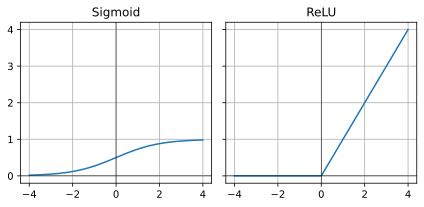

In [34]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

x = np.linspace(-4, 4, 200)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)

axs[0].plot(x, sigmoid)
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)
axs[0].grid(True)
axs[0].set_title('Sigmoid')

axs[1].plot(x, relu)
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)
axs[1].grid(True)
axs[1].set_title('ReLU')

plt.yticks([0, 1, 2, 3, 4])
plt.tight_layout()
plt.show()

## Forward Propagation

{numref}`forward-pass` represents the simplest form of a neural network: stacking $\boldsymbol{z^{[n]}} = \boldsymbol{W^{[n]}} \cdot \boldsymbol{a^{[n-1]}} + \boldsymbol{b^{[n]}}$ and $\boldsymbol{a^{[n]}} = f(\boldsymbol{z^{[n]}})$, where the previous layer's output $\boldsymbol{a^{[n-1]}}$ becomes the input of the next layer. This type of network is known as a feedforward neural network (FFN) or a multilayer perceptron (MLP). To make different layers clear, square bracket superscripts are used to differentiate between layers. For example, $\boldsymbol{a^{[1]}}$ represents the output of the first layer, and $\boldsymbol{W^{[1]}}$ represents the parameters of the first layer.

```{figure} ../img/ch-data-science/forward-pass.svg
---
width: 800px
name: forward-pass
---
Forward propagation in a neural network
```

{numref}`forward-pass` illustrates the process of forward propagation in a neural network. Assuming the input $\boldsymbol{x}$ is a 3-dimensional vector, each circle in {numref}`forward-pass` represents an element (a scalar value) of the vector. The diagram also demonstrates the vectorized calculation of $\boldsymbol{a^{[1]}}$ in the first layer and the scalar calculation of $z^{[1]}_1$. In practice, modern processors' vectorized engines are often utilized for such computations.

## Backpropagation

The training of a neural network is updating the $\boldsymbol{W}$ and $\boldsymbol{b}$ values of each layer.

First, initialize the $\boldsymbol{W}$ and $\boldsymbol{b}$ values of each layer using some random initialization method, such as initializing them from a normal distribution.

Then, define a loss function $L$. The loss function measures the difference between the predicted values $\hat{y}$ of the neural network and the true values $y$. The goal of training is to minimize the loss function. For example, in a housing price prediction case, the squared error is commonly used as the loss function, where the loss function for a single sample is defined as $L = (y - \hat{y})^2$.

Next, calculate the derivatives of the loss function with respect to the parameters of each layer. The derivatives of $L$ with respect to the $\boldsymbol{W^{[l]}}$ and $\boldsymbol{b^{[l]}}$ of the $l$-th layer are denoted as $\frac{\partial L}{\partial \boldsymbol{W^{[l]}}}$ and $\frac{\partial L}{\partial \boldsymbol{b^{[l]}}}$, respectively. The $\boldsymbol{W^{[l]}}$ and $\boldsymbol{b^{[l]}}$ are then updated using the following formulas:

$$ 
\begin{aligned} 
\boldsymbol{W^{[l]}} &= \boldsymbol{W^{[l]}}-\alpha\frac{\partial L}{\partial \boldsymbol{W^{[l]}}} \\
\boldsymbol{b^{[l]}} &= \boldsymbol{b^{[l]}}-\alpha\frac{\partial L}{\partial \boldsymbol{b^{[l]}}}\ 
\end{aligned} 
$$

Here, $\alpha$ is the learning rate, which controls the speed of parameter updates. If the learning rate is too large, the algorithm may oscillate and fail to converge. If the learning rate is too small, the convergence speed may be too slow.

The derivatives of each layer are also referred to as gradients. The parameters are updated in the descenting direction of the gradients, which is known as gradient descent. When computing the derivatives of each layer, it starts from the loss function and calculates the gradients layer by layer in a backward manner, using the chain rule. {numref}`back-propagation` illustrates the process of backpropagation in a neural network.

```{figure} ../img/ch-data-science/back-propagation.svg
---
width: 800px
name: back-propagation
---
Backpropagation in a neural network
```

## Hyperparameters

During the neural network training phase, there are several parameters that need to be manually set before training the model. These parameters cannot be learned automatically through the model's backpropagation and require manual selection and adjustment. These parameters are called hyperparameters, and their selection is usually based on experience or trial and error. Here are some examples of hyperparameters:

* Learning rate, which was mentioned earlier as $\alpha$, controls the step size of each parameter update.
* Network architecture: the number of layers in the model, the number of neurons in each layer, the choice of activation functions, etc. Different network architectures may have different performance for different tasks.

## Inference

Model training involves both forward and backward propagation, while model inference only requires forward propagation, where the input is the data that needs to be predicted.